### 1. Create feature

If you want to create the features, first of all download the data from [link](https://cutt.ly/6enDLYG). Be sure to save the folder together with this notebook. 

Otherwise, just jump to section 2.

In [43]:
from PIL import Image
from tqdm import tqdm
import os
path = 'C:/Users/lukma/Desktop/DS/Povetry/valid/fake/'
path_new = 'C:/Users/lukma/Desktop/DS/Povetry/valid/fake_jpg/'
for file in tqdm(os.listdir(path)):
    im = Image.open(path + file)
    rgb_im = im.convert('RGB')
    rgb_im.save(path_new + file.rstrip('.png') + '.jpg')

   


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 146.98it/s]


In [1]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [2]:
#path = ['C:/Users/lukma/Desktop/DS/BST_train/au_jpg/','C:/Users/lukma/Desktop/DS/BST_train/tp_jpg/']
path = ['C:/Users/lukma/Desktop/DS/Povetry/train/real_jpg/', 'C:/Users/lukma/Desktop/DS/Povetry/train/fake_jpg/']
labels = [1, 0]
format_file = ['jpg','jpg']
epsilon = 1e-8
data_train = {}
#number of samples from each dataset
stop = 3000
number_iter = 2 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(2):
    cont = 0
    psd1D_average_org = np.zeros(360)
    print(path[z])
    
    for filename in tqdm(glob.glob(path[z]+"/*."+format_file[z])):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_train["data"] = psd1D_total
data_train["label"] = label_total

output = open('dataset_train_povetry.pkl', 'wb')
pickle.dump(data_train, output)
output.close()
print("DATA Saved")    

  0%|▏                                                                                | 9/3000 [00:00<00:34, 86.77it/s]

C:/Users/lukma/Desktop/DS/Povetry/train/real_jpg/


  0%|▏                                                                                | 9/3000 [00:00<00:34, 86.80it/s]

C:/Users/lukma/Desktop/DS/Povetry/train/fake_jpg/


100%|█████████████████████████████████████████████████████████████████████████████▉| 2999/3000 [00:33<00:00, 89.13it/s]

DATA Saved


In [3]:
path = ['C:/Users/lukma/Desktop/DS/Povetry/valid/real_jpg/', 'C:/Users/lukma/Desktop/DS/Povetry/valid/fake_jpg/']
labels = [1, 0]
format_file = ['jpg','jpg']
epsilon = 1e-8
data_valid = {}
#number of samples from each dataset
stop = 500
number_iter = 2 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(2):
    cont = 0
    psd1D_average_org = np.zeros(360)
    print(path[z])
    
    for filename in tqdm(glob.glob(path[z]+"/*."+format_file[z])):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_valid["data"] = psd1D_total
data_valid["label"] = label_total

output = open('dataset_valid_povetry.pkl', 'wb')
pickle.dump(data_valid, output)
output.close()
print("DATA Saved")

  2%|█▎                                                                                | 8/500 [00:00<00:06, 73.59it/s]

C:/Users/lukma/Desktop/DS/Povetry/valid/real_jpg/


  2%|█▎                                                                                | 8/500 [00:00<00:06, 74.97it/s]

C:/Users/lukma/Desktop/DS/Povetry/valid/fake_jpg/


100%|███████████████████████████████████████████████████████████████████████████████▊| 499/500 [00:06<00:00, 75.01it/s]

DATA Saved


### 2. Loading Features

Now, we load the features. Either the pre-computed ones or the features that you have created.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file_train = open('dataset_train_povetry.pkl', 'rb')
data_train = pickle.load(pkl_file_train)
pkl_file_train.close()
X_train = data_train["data"]
y_train = data_train["label"]

We look at the label distribution, to be sure that we have a balanced dataset.

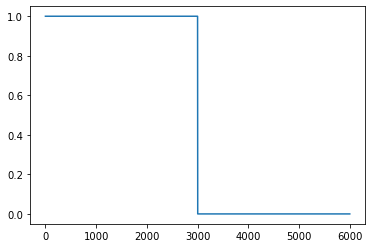

In [3]:
plt.plot(y_train)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file_valid = open('dataset_valid_povetry.pkl', 'rb')
data_valid = pickle.load(pkl_file_valid)
pkl_file_valid.close()
X_valid = data_valid["data"]
y_valid = data_valid["label"]

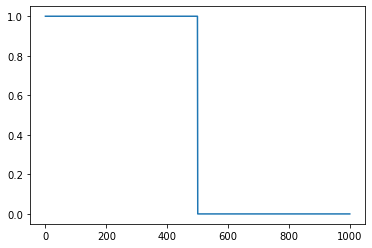

In [5]:
plt.plot(y_valid)

### 3. Check Spectrum

We have a look to the spectrum

3000 3000


Text(0, 0.5, 'Power Spectrum')

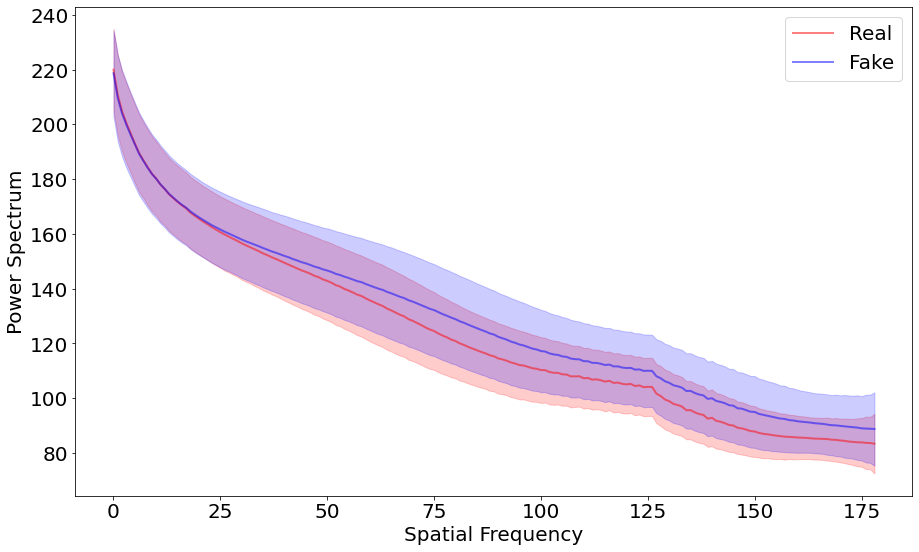

In [25]:
num = int(X_train.shape[0]/2)
num_feat = X_train.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_train.shape[0]):   
    if y_train[x]==0:
        psd1D_org_0[cont_0,:] = X_train[x,:]
        cont_0+=1
    elif y_train[x]==1:
        psd1D_org_1[cont_1,:] = X_train[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

500 500


Text(0, 0.5, 'Power Spectrum')

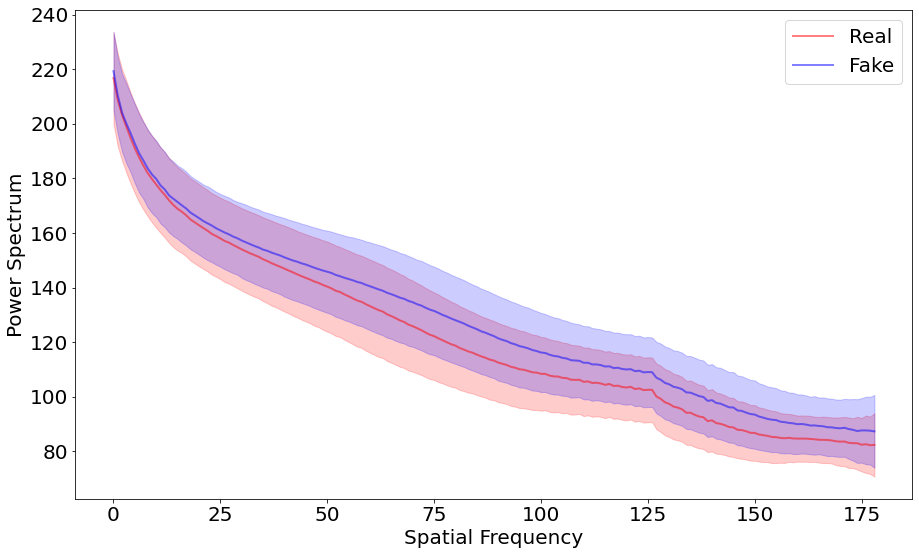

In [9]:
num = int(X_valid.shape[0]/2)
num_feat = X_valid.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_valid.shape[0]):   
    if y_valid[x]==0:
        psd1D_org_0[cont_0,:] = X_valid[x,:]
        cont_0+=1
    elif y_valid[x]==1:
        psd1D_org_1[cont_1,:] = X_valid[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

### 4. Classification

Now we classify using the features.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

num = 100
LR = 0
SVM = 0
KNC = 0


for z in tqdm(range(num)):
    # read python dict back from the file
    pkl_file_train = open('dataset_train_povetry.pkl', 'rb')
    
    data_train = pickle.load(pkl_file_train)
    pkl_file_train.close()
    
    X_train = data_train["data"]
    y_train = data_train["label"]
    
    pkl_file_valid = open('dataset_valid_povetry.pkl', 'rb')
    
    data_valid = pickle.load(pkl_file_valid)
    pkl_file_valid.close()
    
    X_valid = data_valid["data"]
    y_valid = data_valid["label"]
    
    try:

        #from sklearn.model_selection import train_test_split
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        

        from sklearn.svm import SVC
        svclassifier = SVC(kernel='poly')
        svclassifier.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier.score(X_test, y_test)))
        
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(solver='liblinear', max_iter=500)
        logreg.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(logreg.score(X_test, y_test)))
        
        from sklearn.neighbors import KNeighborsClassifier
        knc = KNeighborsClassifier(n_neighbors = 5)
        knc.fit(X_train, y_train)

        
        SVM+=svclassifier.score(X_valid, y_valid)
        LR+=logreg.score(X_valid, y_valid)
        KNC+=knc.score(X_valid, y_valid)

 
    except:
        num-=1
        print(num)
        
print("Average SVM: "+str(SVM/num))
print("Average LR: "+str(LR/num))
print("Average KNC: "+str(KNC/num))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [13:00<00:00,  7.80s/it]

Average SVM: 0.855
Average LR: 0.8259999999999988
Average KNC: 0.807000000000001


In [3]:
filename_svm = 'model_svm_povetry_100.sav'
pickle.dump(svclassifier, open(filename_svm, 'wb'))

In [4]:
filename_lr = 'model_lr_povetry_100.sav'
pickle.dump(logreg, open(filename_lr, 'wb'))

In [5]:
filename_knc = 'model_knc_povetry_100.sav'
pickle.dump(knc, open(filename_knc, 'wb'))

### Метрики качества

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [8]:
svclassifier = pickle.load(open('model_svm_povetry_100.sav', 'rb'))

In [9]:
y_pred_svm = svclassifier.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_svm, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_svm, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_svm, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8553197878090282
Recall score: 0.855
F1 score: 0.8549673676577229


Confusion matrix, without normalization
[[420  80]
 [ 65 435]]


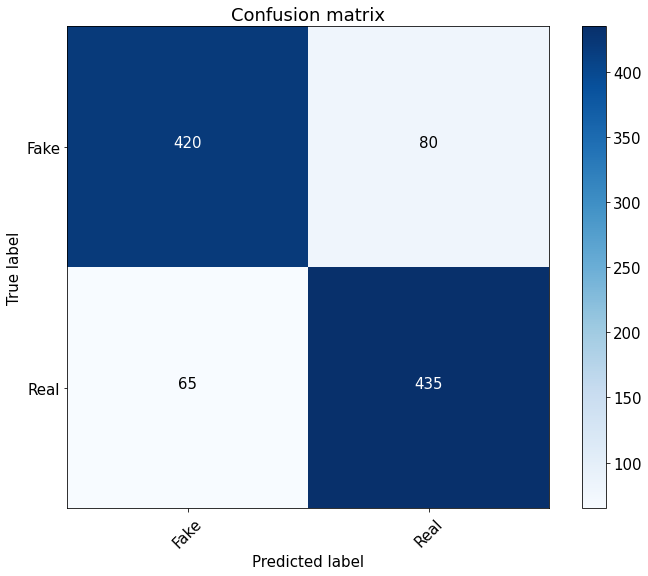

In [22]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm = confusion_matrix(y_valid, svclassifier.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm, classes=['Fake', 'Real'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_svm))

ROC_AUC score: 0.855


### Logistic Regression

In [83]:
logreg = pickle.load(open('model_lr_povetry_100.sav', 'rb'))

In [84]:
y_pred_lr = logreg.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_lr, average= "weighted")
print("SNM /nPrecision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_lr, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_lr, average= "weighted")
print("F1 score: {}".format(score_lr1))

SNM /nPrecision score: 0.8261878842213114
Recall score: 0.826
F1 score: 0.8259749403914164


Confusion matrix, without normalization
[[419  81]
 [ 93 407]]


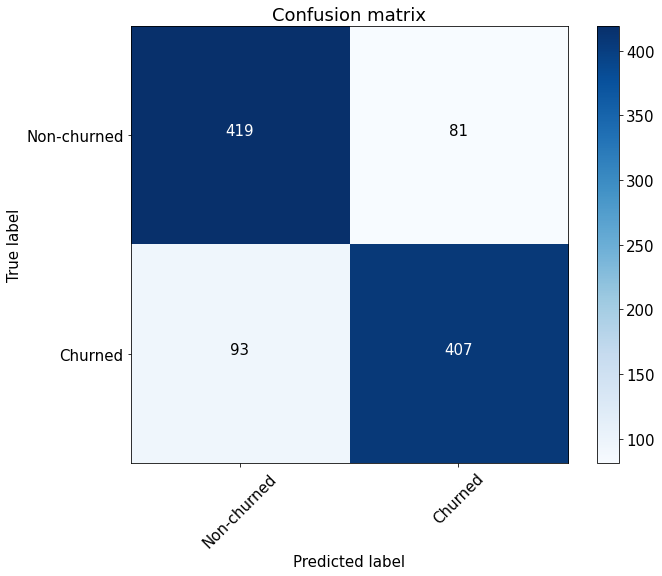

In [85]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr = confusion_matrix(y_valid, logreg.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_lr))

ROC_AUC score: 0.8260000000000001


### K Neighbours

In [86]:
knc = pickle.load(open('model_knc_povetry_100.sav', 'rb'))

In [87]:
y_pred_knc = knc.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_knc, average= "weighted")
print("SNM /nPrecision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_knc, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_knc, average= "weighted")
print("F1 score: {}".format(score_lr1))

SNM /nPrecision score: 0.8070110523978863
Recall score: 0.807
F1 score: 0.8069982629843668


Confusion matrix, without normalization
[[402  98]
 [ 95 405]]


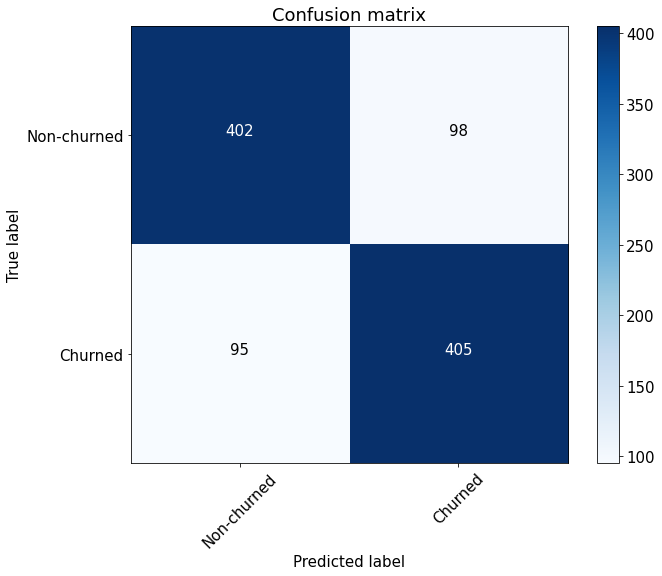

In [90]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_knc = confusion_matrix(y_valid, knc.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_knc, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [89]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_knc))

ROC_AUC score: 0.807


### Проверяем на тестовом наборе данных

In [15]:
loaded_model_kn = pickle.load(open('model_knc_povetry_100.sav', 'rb'))

In [16]:
loaded_model_svm = pickle.load(open('model_svm_povetry_100.sav', 'rb'))
loaded_model_lr = pickle.load(open('model_lr_povetry_100.sav', 'rb'))

In [93]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [34]:
path = ['C:/Users/lukma/Desktop/DS/Povetry/test/real_jpg/', 'C:/Users/lukma/Desktop/DS/Povetry/test/fake_jpg/']
labels = [1,0]
format_file = ['jpg','jpg']
epsilon = 1e-8
data_test = {}
#number of samples from each dataset
stop = 500
number_iter = 2 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(2):
    cont = 0
    psd1D_average_org = np.zeros(179)
    print(path[z])
    
    for filename in tqdm(glob.glob(path[z]+"/*."+format_file[z])):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_test["data"] = psd1D_total
data_test["label"] = label_total

output = open('dataset_test_povetry.pkl', 'wb')
pickle.dump(data_test, output)
output.close()
print("DATA Saved")

  1%|▉                                                                                 | 6/500 [00:00<00:08, 56.76it/s]

C:/Users/lukma/Desktop/DS/Povetry/test/real_jpg/


  1%|█▏                                                                                | 7/500 [00:00<00:08, 59.48it/s]

C:/Users/lukma/Desktop/DS/Povetry/test/fake_jpg/


100%|███████████████████████████████████████████████████████████████████████████████▊| 499/500 [00:09<00:00, 54.40it/s]

DATA Saved


In [125]:
pkl_file_test = open('dataset_test_povetry.pkl', 'rb')
data_test = pickle.load(pkl_file_test)
pkl_file_test.close()
X_test = data_test["data"]
y_test = data_test["label"]

In [126]:
print(len(X_test))
print(len(y_test))

1000
1000


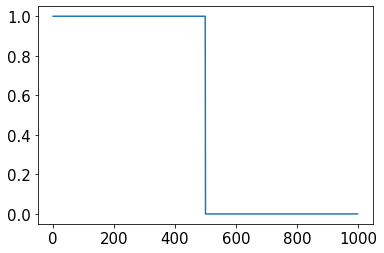

In [127]:
plt.plot(y_test)

500 500


Text(0, 0.5, 'Power Spectrum')

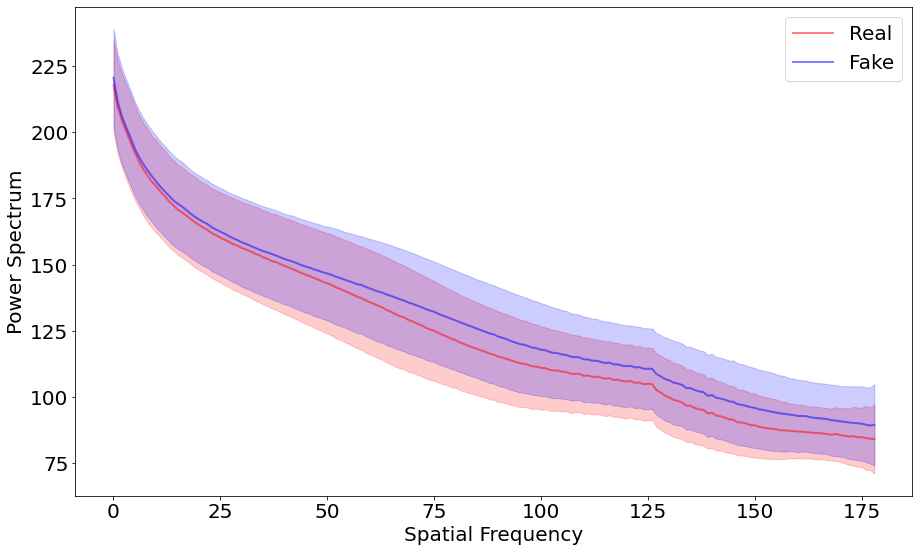

In [128]:
num = int(X_test.shape[0]/2)
num_feat = X_test.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_test.shape[0]):   
    if y_test[x]==0:
        psd1D_org_0[cont_0,:] = X_test[x,:]
        cont_0+=1
    elif y_test[x]==1:
        psd1D_org_1[cont_1,:] = X_test[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

In [129]:
result_svm = loaded_model_svm.score(X_test, y_test)
result_lr = loaded_model_lr.score(X_test, y_test)
result_kn = loaded_model_kn.score(X_test, y_test)

print(result_svm)
print(result_lr)
print(result_kn)

0.839
0.811
0.824


In [130]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [131]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [156]:
y1_pred_svm = loaded_model_svm.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_svm, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_svm, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_svm, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.839991414966041
Recall score: 0.839
F1 score: 0.8388825453755788


Confusion matrix, without normalization
[[406  94]
 [ 67 433]]


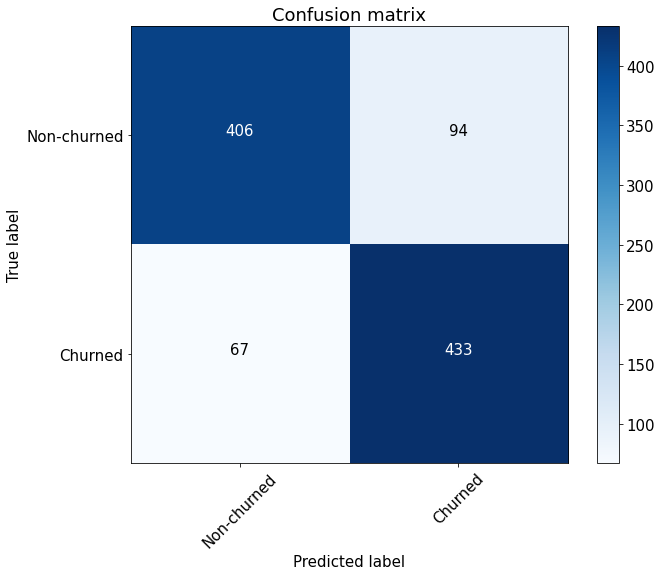

In [157]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm1 = confusion_matrix(y_test, loaded_model_svm.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [158]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_svm))

ROC_AUC score: 0.8390000000000001


### Logistic regression

In [159]:
y1_pred_lr = loaded_model_lr.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_lr, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_lr, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_lr, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8112103782156737
Recall score: 0.811
F1 score: 0.8109680536010585


Confusion matrix, without normalization
[[399 101]
 [ 88 412]]


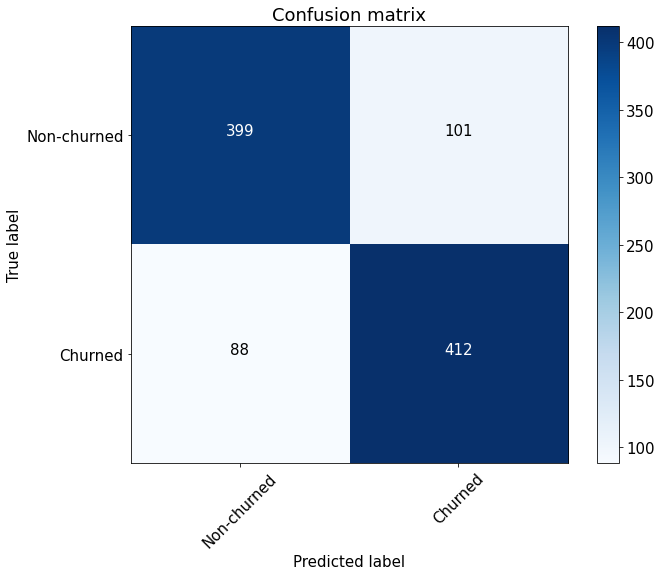

In [160]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr1 = confusion_matrix(y_test, loaded_model_lr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [161]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_lr))

ROC_AUC score: 0.8109999999999999


### K Neighbours

In [162]:
y1_pred_kn = loaded_model_kn.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_kn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_kn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_kn, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8247482198986466
Recall score: 0.824
F1 score: 0.8238985655737705


Confusion matrix, without normalization
[[400 100]
 [ 76 424]]


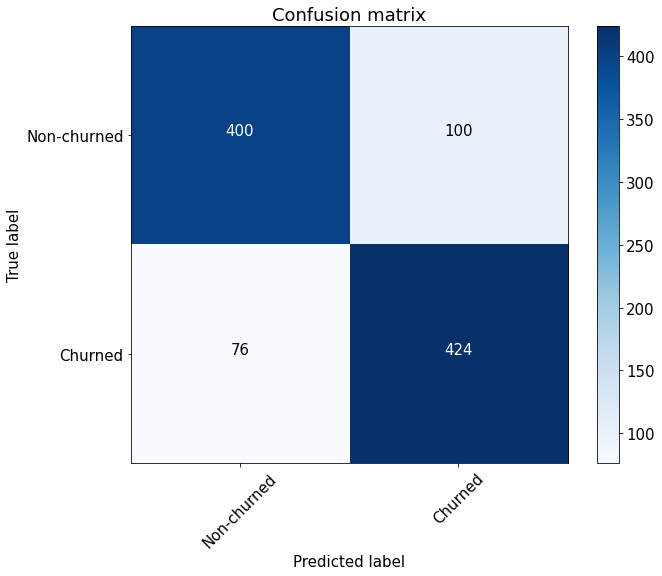

In [163]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_kn1 = confusion_matrix(y_test, loaded_model_kn.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_kn1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [164]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_kn))

ROC_AUC score: 0.824


# Проверяем на другом тестовом наборе

In [11]:
pkl_file_test1 = open('dataset_test_BST.pkl', 'rb')
data_test1 = pickle.load(pkl_file_test1)
pkl_file_test1.close()
X_test1 = data_test1["data"]
y_test1 = data_test1["label"]

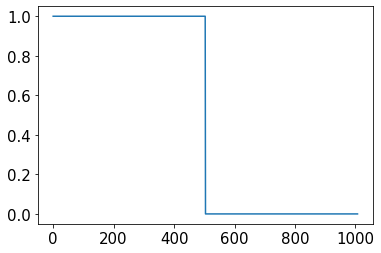

In [12]:
plt.plot(y_test1)

504 504


Text(0, 0.5, 'Power Spectrum')

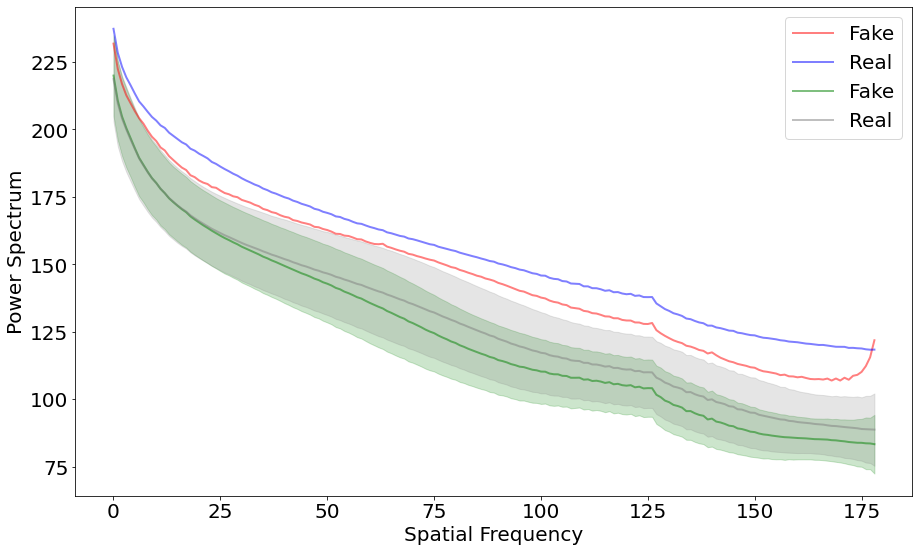

In [26]:
num1 = int(X_test1.shape[0]/2)
num_feat1 = X_test1.shape[1]

psd1D_org1_0 = np.zeros((num1,num_feat1))
psd1D_org1_1 = np.zeros((num1,num_feat1))
psd1D_org1_0_mean = np.zeros(num_feat1)
psd1D_org1_0_std = np.zeros(num_feat1)
psd1D_org1_1_mean = np.zeros(num_feat1)
psd1D_org1_1_std = np.zeros(num_feat1)

cont1_0=0
cont1_1=0

# We separate real and fake using the label
for x in range(X_test1.shape[0]):   
    if y_test1[x]==0:
        psd1D_org1_0[cont1_0,:] = X_test1[x,:]
        cont1_0+=1
    elif y_test1[x]==1:
        psd1D_org1_1[cont1_1,:] = X_test1[x,:]
        cont1_1+=1

print (cont1_0, cont1_1)        

# We compute statistcis
for x in range(num_feat1):
    psd1D_org1_0_mean[x] = np.mean(psd1D_org1_0[:,x])
    psd1D_org1_0_std[x]= np.std(psd1D_org1_0[:,x])
    psd1D_org1_1_mean[x] = np.mean(psd1D_org1_1[:,x])
    psd1D_org1_1_std[x]= np.std(psd1D_org1_1[:,x])
    
# Plot
x1 = np.arange(0, num_feat1, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x1, psd1D_org1_0_mean, alpha=0.5, color='red', label='Fake', linewidth =2.0)
#ax.fill_between(x1, psd1D_org1_0_mean - psd1D_org1_0_std, psd1D_org1_0_mean + psd1D_org1_0_std, color='red', alpha=0.2)
ax.plot(x1, psd1D_org1_1_mean, alpha=0.5, color='blue', label='Real', linewidth =2.0)
#ax.fill_between(x1, psd1D_org1_1_mean - psd1D_org1_1_std, psd1D_org1_1_mean + psd1D_org1_1_std, color='blue', alpha=0.2)

x = np.arange(0, num_feat, 1)
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='green', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='green', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='gray', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='gray', alpha=0.2)

ax.legend()

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

In [17]:
result_svm = loaded_model_svm.score(X_test1, y_test1)
result_lr = loaded_model_lr.score(X_test1, y_test1)
result_kn = loaded_model_kn.score(X_test1, y_test1)

print(result_svm)
print(result_lr)
print(result_kn)

0.5218253968253969
0.5148809523809523
0.5208333333333334


### Метрики качества

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [20]:
y2_pred_svm = loaded_model_svm.predict(X_test1)

score = metrics.precision_score(y_test1,y2_pred_svm, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test1,y2_pred_svm, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test1,y2_pred_svm, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.7555780933062881
Recall score: 0.5218253968253969
F1 score: 0.38008012861408125


Confusion matrix, without normalization
[[ 22 482]
 [  0 504]]


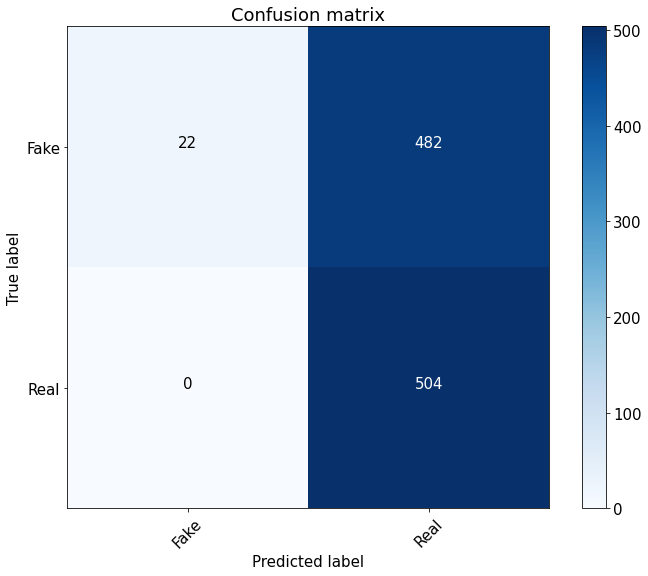

In [23]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm2 = confusion_matrix(y_test1, loaded_model_svm.predict(X_test1))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm2, classes=['Fake', 'Real'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [149]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test1,y2_pred_svm))

ROC_AUC score: 0.5218253968253967


### Logistic regression

In [150]:
y2_pred_lr = loaded_model_lr.predict(X_test1)

score = metrics.precision_score(y_test1,y2_pred_lr, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test1,y2_pred_lr, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test1,y2_pred_lr, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.6427115188583078
Recall score: 0.5148809523809523
F1 score: 0.3749015579524054


Confusion matrix, without normalization
[[ 21 483]
 [  6 498]]


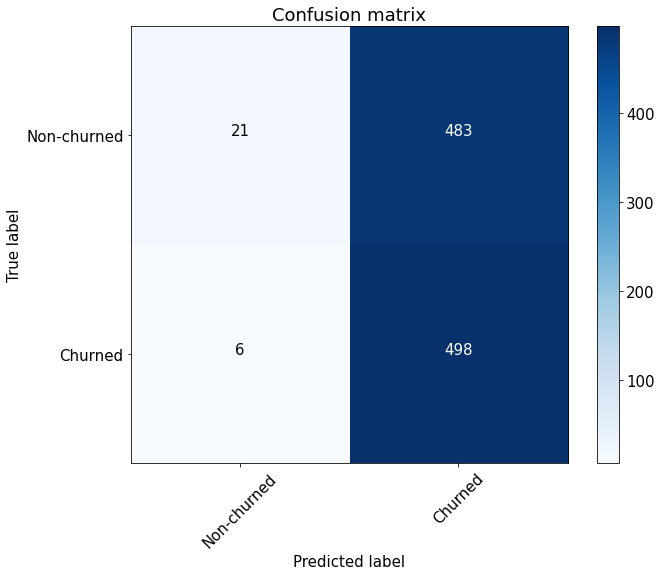

In [151]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr2 = confusion_matrix(y_test1, loaded_model_lr.predict(X_test1))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr2, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [152]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test1,y2_pred_lr))

ROC_AUC score: 0.5148809523809523


### K Neighbours

In [153]:
y2_pred_kn = loaded_model_kn.predict(X_test1)

score = metrics.precision_score(y_test1,y2_pred_kn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test1,y2_pred_kn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test1,y2_pred_kn, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.674728431340179
Recall score: 0.5208333333333334
F1 score: 0.3855326345548284


Confusion matrix, without normalization
[[ 26 478]
 [  5 499]]


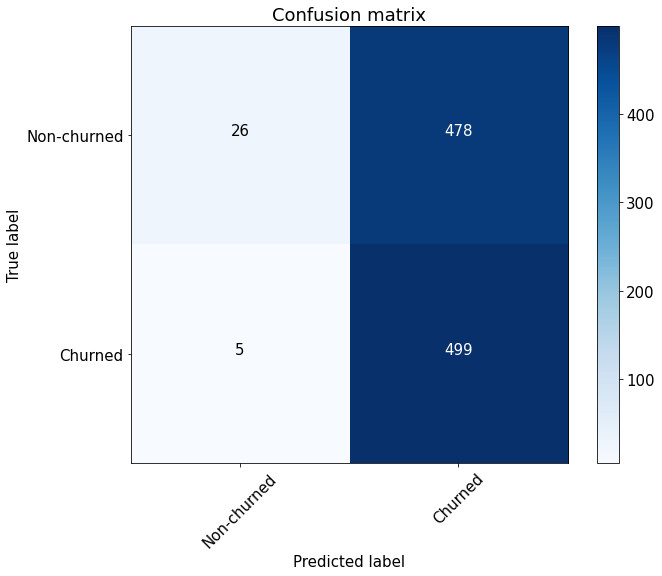

In [154]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_kn2 = confusion_matrix(y_test1, loaded_model_kn.predict(X_test1))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_kn2, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [155]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test1,y2_pred_kn))

ROC_AUC score: 0.5208333333333334


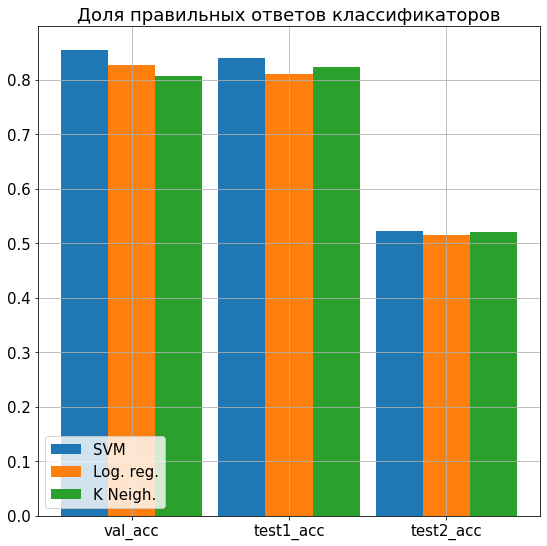

In [168]:
groups = ['val_acc', 'test1_acc', 'test2_acc']
g1 = [svclassifier.score(X_valid, y_valid), svclassifier.score(X_test, y_test), svclassifier.score(X_test1, y_test1)] 
g2 = [logreg.score(X_valid, y_valid), logreg.score(X_test, y_test), logreg.score(X_test1, y_test1)]
g3 = [knc.score(X_valid, y_valid), knc.score(X_test, y_test), knc.score(X_test1, y_test1)]
width = 0.3
x = np.arange(len(groups))
fig, ax = plt.subplots(figsize = (9, 9))
rects1 = ax.bar(x - width, g1, width, label='SVM')
rects2 = ax.bar(x, g2, width, label='Log. reg.')
rects3 = ax.bar(x + width, g3, width, label='K Neigh.')
ax.set_title('Доля правильных ответов классификаторов')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend(loc = 3)
ax.grid(True)